### Домашнее задание № 2

Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [3]:
train_set = torchvision.datasets.FashionMNIST(
      root='./data/FashionMNIST'
        ,train=True
        ,download=True
        ,transform=transforms.Compose([
            transforms.ToTensor()
        ])                                            
  )

test_set = torchvision.datasets.FashionMNIST(
      root='./data/FashionMNIST'
        ,train=False
        ,download=True
        ,transform=transforms.Compose([
            transforms.ToTensor()
        ])                                            
  )

In [4]:
BATCH_SIZE=256

In [5]:
train = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle = True)
test = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

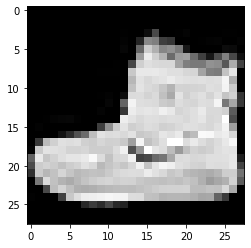

In [6]:
plt.imshow(train_set[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [101]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    
    torch.nn.Linear(256,48),
    torch.nn.BatchNorm1d(48),
    torch.nn.ReLU(),
    
    torch.nn.Linear(48,10)
)

In [102]:
learning_rate = 0.001
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 10

In [103]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.6117878840324726, train_acc: 0.8276166666666667, test_loss: 0.4154308266937733, test_acc: 0.8546
ep: 1, train_loss: 0.3434878258629048, train_acc: 0.8788, test_loss: 0.3589386872947216, test_acc: 0.8689
ep: 2, train_loss: 0.29877492817158396, train_acc: 0.8924833333333333, test_loss: 0.33807045258581636, test_acc: 0.8732
ep: 3, train_loss: 0.27000515315126866, train_acc: 0.9014833333333333, test_loss: 0.3330154582858086, test_acc: 0.8775
ep: 4, train_loss: 0.24945292079702336, train_acc: 0.9072666666666667, test_loss: 0.3238409601151943, test_acc: 0.8812
ep: 5, train_loss: 0.2313144359816896, train_acc: 0.9154, test_loss: 0.33453524522483347, test_acc: 0.8778
ep: 6, train_loss: 0.21438844631961052, train_acc: 0.9215, test_loss: 0.33216821737587454, test_acc: 0.8826
ep: 7, train_loss: 0.20177031600094855, train_acc: 0.9255, test_loss: 0.3138857264071703, test_acc: 0.8875
ep: 8, train_loss: 0.1884647731451278, train_acc: 0.9307833333333333, test_loss: 0.3233998287469

Посмотрим на предсказание номера класса и фактическое значение:

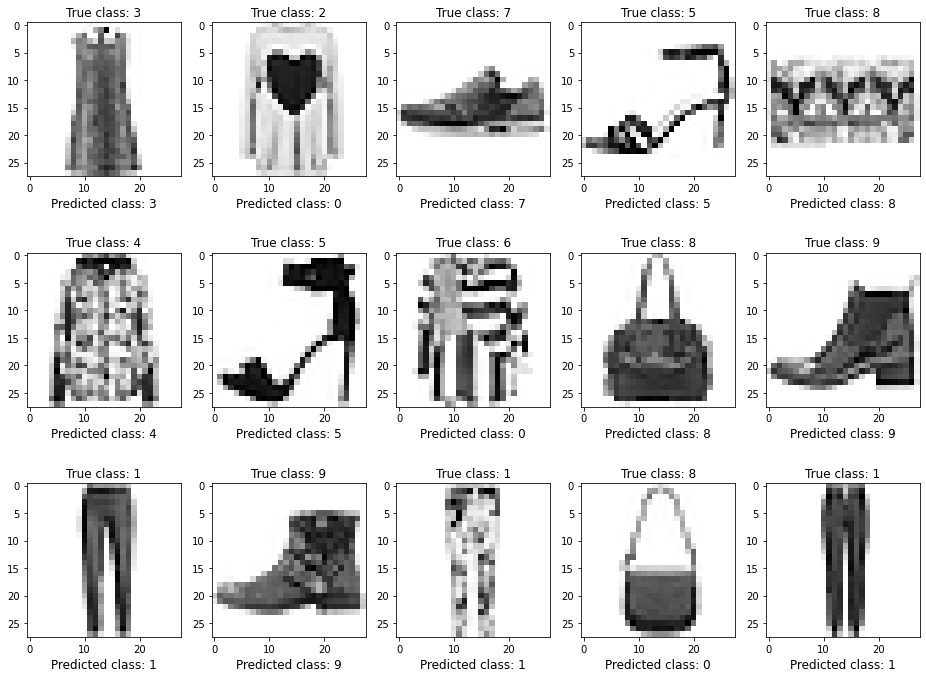

In [104]:
plt.figure(figsize=(16,12))

for i in range(0,15):
    plt.subplot(3,5, int(i)+1)
    img = X[i][0].numpy().reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.title('True class: '+str(y[i].detach().numpy()))
    plt.xlabel('Predicted сlass: '+str(np.argmax(y_pred[i].detach().numpy())),fontsize = 12)